In [30]:
import tensorflow as tf
print("tensorflow version", tf.__version__)

import cv2
import numpy as np

tensorflow version 2.20.0


In [31]:
import os
data_dir = os.path.join(os.getcwd(), "data", 'DogsVsCats' ,"code_test")
print(data_dir)

labels = {0 : 'cat' , 1 : 'dog'}
X = []
Y = []

for img in os.listdir(data_dir):
        image = cv2.imread(os.path.join(data_dir,img))
        image = cv2.resize(image,(64,64))
        X.append(image)

        Y.append(0 if 'cat' in img.lower() else 1)

X = np.array(X)
Y = np.array(Y)

print(f"Loaded {len(X)} images")
print(f"Labels: {Y}")

print("shape of X :", X.shape)
print("shape of X :", Y.shape)


C:\Users\zabeeh\PycharmProjects\DeepLearning\CompleteProjects\BenchmarkDatasets\data\DogsVsCats\code_test
Loaded 31 images
Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
shape of X : (31, 64, 64, 3)
shape of X : (31,)


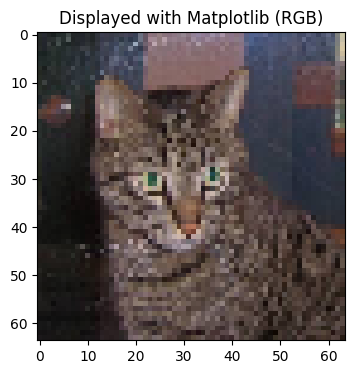

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))


image_rgb = cv2.cvtColor(X[1], cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Displayed with Matplotlib (RGB)")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)

print("shape of trainX :", trainX.shape)
print("shape of trainY :", trainY.shape)
print("shape of testX :", testX.shape)
print("shape of testY :", testY.shape)

shape of trainX : (24, 64, 64, 3)
shape of trainY : (24,)
shape of testX : (7, 64, 64, 3)
shape of testY : (7,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D,BatchNormalization,Activation,MaxPool2D,Dropout,Flatten,Dense
model = Sequential([
    Input(shape=(64,64,3)),

    Conv2D(32,(3,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(),

    Conv2D(64,(3,3)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),

    Flatten(),
    Dense(128),
    BatchNormalization(),
     Dropout(0.5),
    Dense(2,activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,889,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,910,146 (26.36 MB)

 Trainable params: 6,909,698 (26.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(), loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(trainX,trainY,validation_split=0.1,epochs=2)

model.save(os.path.join(os.getcwd(), "data", 'DogsVsCats') + r'model.keras')

Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0156 - val_accuracy: 0.6667 - val_loss: 65.0320
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.6667 - val_loss: 87.3344


In [27]:
model.evaluate(testX,testY)

y_pred = model.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import classification_report
classification_report(testY,y_pred_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7143 - loss: 94.2848
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


C:\Users\zabeeh\PycharmProjects\DeepLearning\v_general\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\zabeeh\PycharmProjects\DeepLearning\v_general\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\zabeeh\PycharmProjects\DeepLearning\v_general\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         2\n           1       0.71      1.00      0.83         5\n\n    accuracy                           0.71         7\n   macro avg       0.36      0.50      0.42         7\nweighted avg       0.51      0.71      0.60         7\n'

C:\Users\zabeeh\AppData\Local\Temp\ipykernel_20704\367205648.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


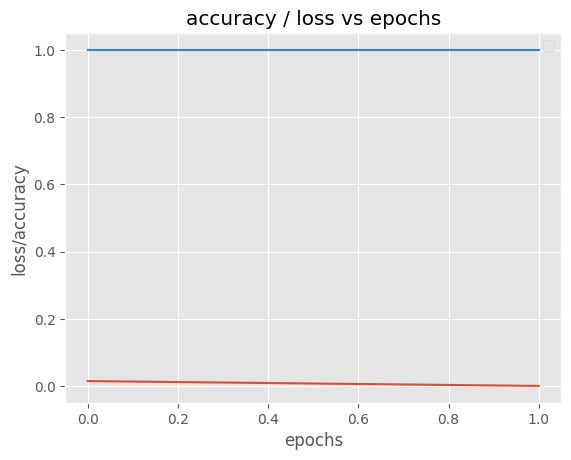

In [24]:
plt.figure()
plt.style.use('ggplot')
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('accuracy / loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss/accuracy')
plt.legend()
plt.show()